In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
pd.options.display.max_colwidth = 100
pd.set_option('display.precision', 3)

## Load Data

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/coderush/'
stocks_df = pd.read_csv(path+'stocks_combined_close.csv')

In [ ]:
df = stocks_df.copy()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
##setting "Date" column as index.
df.set_index('Date', inplace=True)

## Tickers full name

AAPL : Apple Inc

ANF : Abercrombie & Fitch Co

GIS : General Mills, Inc

HRL : Hormel Foods Corp

K : Kellogg Company

PIM : Putnam Master Intermediate Income Trust

SBUX : Starbucks Corporation

VZ : Verizon Communications Inc.

## Get last 5 years data

In [ ]:
df = df.loc['2016-01-01':'2020-12-30']

In [ ]:
##using resample() to convert to weekly, monthly, yearly data
weekly_data = df.resample('w').mean()
monthly_data = df.resample('M').mean()
yearly_data = df.resample('Y').mean()

In [ ]:
def line_plot(stocks_df,startrange,endrange):
  ''' Line plot of stock assets based on start and end dates'''

  df = stocks_df
  fig = px.line(df, x='Date', y=df.columns,range_x=[startrange,endrange],
              hover_data={"Date": "|%B %d, %Y"},
              title='Line chart of Stocks')
  fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
  fig.show()

In [ ]:
def interactive_plot(df, title, startrange, endrange):
  ''' Line plot based on start and end date 
      df is data to be visualized
      title should be a string
      start and end dates should be datetime'''
  fig = px.line(title = title, range_x=[startrange,endrange])
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
interactive_plot(weekly_data.reset_index(), 'Weekly', '2016-01-01', '2020-12-30')

In [ ]:
line_plot(monthly_data.reset_index(), '2016-01-01', '2020-12-30')

In [ ]:
df.head()

,AAPL,ANF,GIS,HRL,K,PIM,SBUX,VZ
Date,,,,,,,,
2016-01-04,25.352,26.099,51.789,38.770,63.531,2.841,55.205,41.385
2016-01-06,22.833,16.306,50.726,30.510,61.524,2.869,49.770,39.050
2016-01-07,22.237,15.162,57.768,32.150,67.028,2.866,51.740,43.541
2016-01-08,24.593,17.301,57.902,33.408,67.660,2.929,52.321,42.627
2016-01-11,25.994,12.230,50.201,34.045,62.168,2.995,47.830,37.702


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3652590f10>,
      dtype=object)

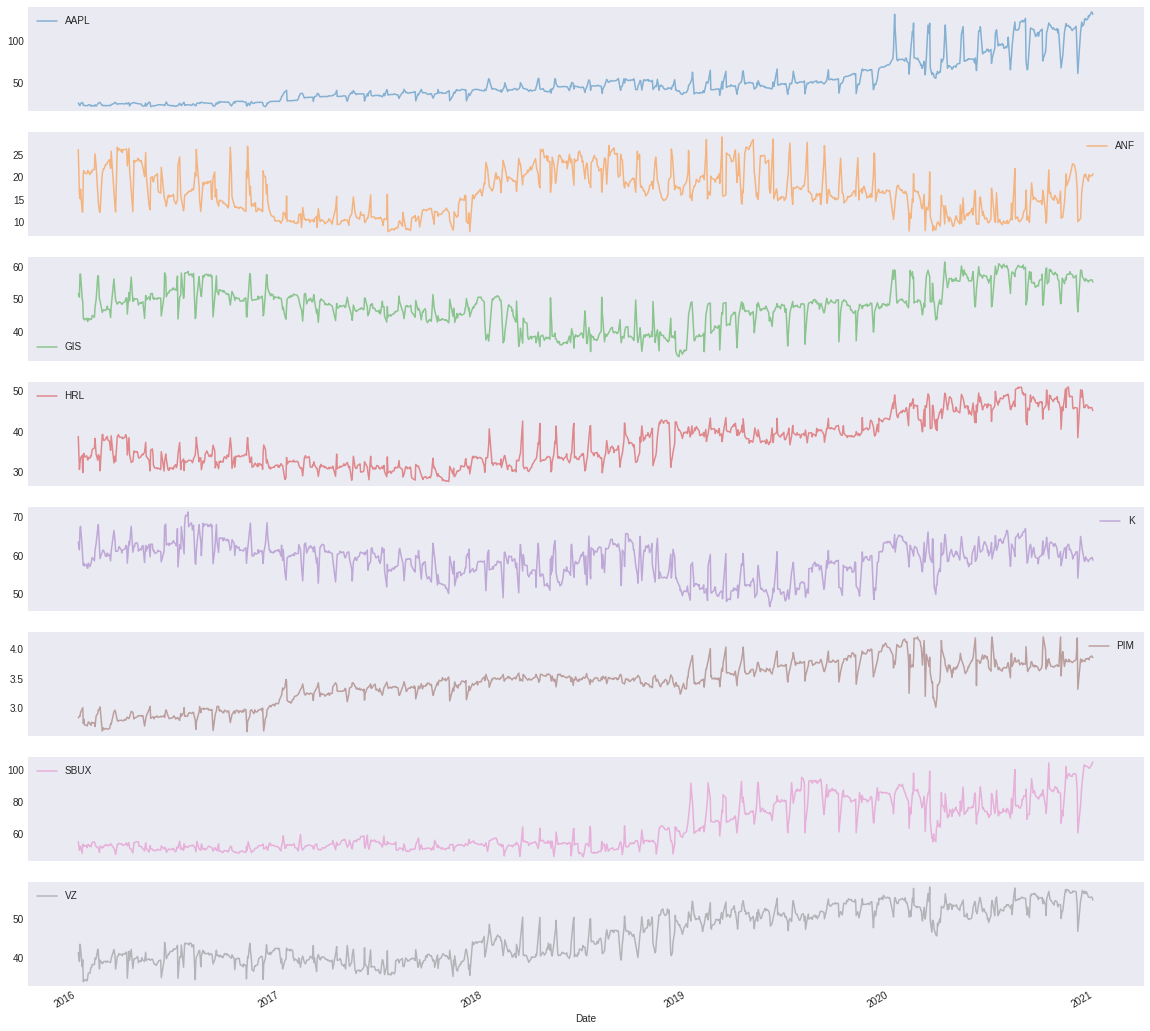

In [ ]:
df.plot(figsize = (20, 20), alpha = 0.5, subplots=True)

In [ ]:
df.head()

,AAPL,ANF,GIS,HRL,K,PIM,SBUX,VZ
Date,,,,,,,,
2016-01-04,25.352,26.099,51.789,38.770,63.531,2.841,55.205,41.385
2016-01-06,22.833,16.306,50.726,30.510,61.524,2.869,49.770,39.050
2016-01-07,22.237,15.162,57.768,32.150,67.028,2.866,51.740,43.541
2016-01-08,24.593,17.301,57.902,33.408,67.660,2.929,52.321,42.627
2016-01-11,25.994,12.230,50.201,34.045,62.168,2.995,47.830,37.702


## Calculate average returns
- Daily Avg return
- Weekly Avg Return
- Monthly Avg Return
- Yearly Avg Return

In [ ]:
df.head()

,AAPL,ANF,GIS,HRL,K,PIM,SBUX,VZ
Date,,,,,,,,
2016-01-04,25.352,26.099,51.789,38.770,63.531,2.841,55.205,41.385
2016-01-06,22.833,16.306,50.726,30.510,61.524,2.869,49.770,39.050
2016-01-07,22.237,15.162,57.768,32.150,67.028,2.866,51.740,43.541
2016-01-08,24.593,17.301,57.902,33.408,67.660,2.929,52.321,42.627
2016-01-11,25.994,12.230,50.201,34.045,62.168,2.995,47.830,37.702


In [ ]:
df.columns

Index(['AAPL', 'ANF', 'GIS', 'HRL', 'K', 'PIM', 'SBUX', 'VZ'], dtype='object')

In [ ]:
def avg_return(df, col_name):
  new_df = df
  names = new_df.columns
  temp = []
  for i in range(len(names)):
    # Calculate Percentage change 
    temp.append(((new_df[names[i]].pct_change().fillna(0))*100).mean())
  result_df = pd.DataFrame(temp)
  result_df.columns = [col_name]
  return result_df


In [ ]:
avg_daily_return = avg_return(df, 'Avg_Daily_Return')

In [ ]:
avg_daily_return

,Avg_Daily_Return
0,0.628
1,1.215
2,0.201
3,0.144
4,0.099
5,0.073
6,0.271
7,0.116


In [ ]:
avg_weekly_return = avg_return(weekly_data, 'Avg_Weekly_Return')

In [ ]:
avg_weekly_return

,Avg_Weekly_Return
0,1.603
1,1.868
2,0.300
3,0.299
4,0.099
5,0.173
6,0.580
7,0.240


In [ ]:
avg_monthly_return = avg_return(monthly_data, 'Avg_Monthly_Return')

In [ ]:
np.std(monthly_data, axis=0)

AAPL    24.993
ANF      4.242
GIS      5.679
HRL      5.721
K        3.768
PIM      0.334
SBUX    14.086
VZ       6.167
dtype: float64

In [ ]:
avg_monthly_return

,Avg_Monthly_Return
0,3.025
1,0.571
2,0.365
3,0.591
4,0.053
5,0.546
6,1.127
7,0.715


In [ ]:
avg_yearly_return = avg_return(yearly_data, 'Avg_Yearly_Return')

In [ ]:
avg_yearly_return

,Avg_Yearly_Return
0,34.188
1,2.427
2,2.463
3,7.134
4,-0.198
5,5.670
6,10.711
7,6.282


In [ ]:
stock_names = df.columns
names_df = pd.DataFrame(stock_names, columns=['Symbol'])

In [ ]:
avg_return_df = pd.concat([names_df, avg_daily_return, avg_weekly_return, avg_monthly_return, avg_yearly_return], axis=1)

In [ ]:
avg_return_df

,Symbol,Avg_Daily_Return,Avg_Weekly_Return,Avg_Monthly_Return,Avg_Yearly_Return
0,AAPL,0.628,1.603,3.025,34.188
1,ANF,1.215,1.868,0.571,2.427
2,GIS,0.201,0.300,0.365,2.463
3,HRL,0.144,0.299,0.591,7.134
4,K,0.099,0.099,0.053,-0.198
5,PIM,0.073,0.173,0.546,5.670
6,SBUX,0.271,0.580,1.127,10.711
7,VZ,0.116,0.240,0.715,6.282


In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[
#     go.Bar(name='Avg_Weekly_Return', x=Avg_Return_df['Symbol'], y=Avg_Return_df['Avg_Weekly_Return']),
#     go.Bar(name='Avg_Monthly_Return', x=Avg_Return_df['Symbol'], y=Avg_Return_df['Avg_Monthly_Return'])
# ])
# # Change the bar mode
# fig.update_layout(barmode='stack')
# fig.show()

In [ ]:
def return_compare(Avg_Return_df):
  fig = go.Figure()
  fig.add_trace(go.Bar(x=Avg_Return_df['Symbol'],
                y=Avg_Return_df['Avg_Weekly_Return'],
                name='Avg_Weekly_Return',
                marker_color='rgb(55, 83, 109)'
                ))
  fig.add_trace(go.Bar(x=Avg_Return_df['Symbol'],
                y=Avg_Return_df['Avg_Monthly_Return'],
                name='Avg_Monthly_Return',
                marker_color='rgb(26, 118, 255)'
                ))

  fig.update_layout(
    title='Return comparison(Weekly vs Monthly)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Percentage',
        titlefont_size=16,
        tickfont_size=14,
    ),
      legend=dict(
        x=0,
        y=1.0,
          bgcolor='rgba(255, 255, 255, 0)',
          bordercolor='rgba(255, 255, 255, 0)'
    ),
      barmode='group',
      bargap=0.15, # gap between bars of adjacent location coordinates.
      bargroupgap=0.1 # gap between bars of the same location coordinate.
)
  fig.show()

In [ ]:
return_compare(avg_return_df)

In [ ]:
def horizontal_plot(data, symbols, title, xlabel, ylabel):
  # convert both data and symbols to np array in order
  # to have 2 column dataframe
  data = np.array(data)
  feature_names = np.array(symbols)
  #create dataframe using a dictionary
  data = {'feature_names':feature_names, 'data':data}
  df_i = pd.DataFrame(data)

  #sort the df in descending order
  df_i.sort_values(by=['data'], ascending=False, inplace=True)
  
  #barplot
  plt.figure(figsize=(10,10))
  sns.barplot(x=df_i['data'], y=df_i['feature_names'])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

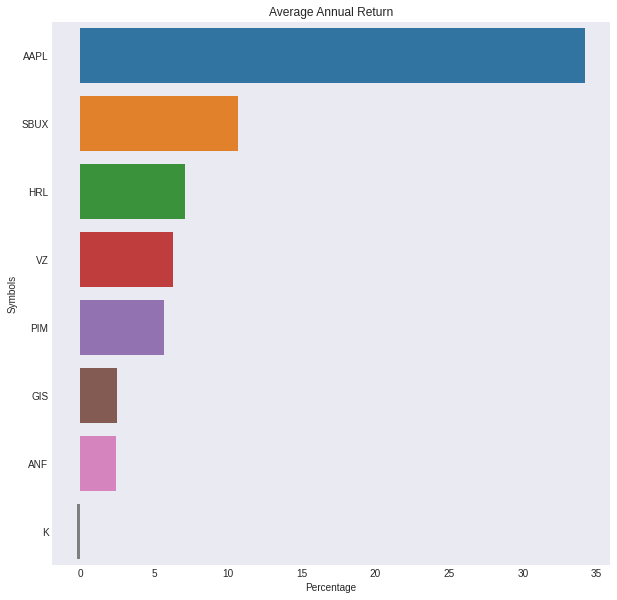

In [ ]:
horizontal_plot(avg_return_df['Avg_Yearly_Return'], avg_return_df['Symbol'], 'Average Annual Return', 'Percentage', 'Symbols')

## Volatility - Monthly Basis
- Variance
- Std Deviation
- Sharpe Ratio


In [ ]:
monthly_data

,AAPL,ANF,GIS,HRL,K,PIM,SBUX,VZ
Date,,,,,,,,
2016-01-31,23.043,19.575,46.947,33.661,59.695,2.802,52.441,37.336
2016-02-29,22.943,20.541,48.497,36.638,61.509,2.750,52.258,39.241
2016-03-31,24.457,23.846,49.449,37.537,61.914,2.819,52.865,40.562
2016-04-30,24.212,22.474,49.774,34.322,62.446,2.869,52.812,39.452
2016-05-31,22.865,18.988,50.162,32.513,61.290,2.861,50.339,39.171
2016-06-30,22.616,15.574,53.080,31.529,63.562,2.861,50.479,41.368
2016-07-31,23.430,16.940,55.746,32.735,66.545,2.901,52.177,42.198
2016-08-31,24.871,18.387,54.669,33.998,65.782,2.941,51.282,40.533
2016-09-30,25.591,14.981,52.065,33.102,63.796,2.936,49.610,40.497


In [ ]:
monthly_data.describe()

,AAPL,ANF,GIS,HRL,K,PIM,SBUX,VZ
count,60.000,60.000,60.000,60.000,60.000,60.000,60.000,60.000
mean,50.011,16.534,47.860,37.220,58.847,3.440,63.712,45.841
std,25.204,4.277,5.727,5.769,3.799,0.337,14.205,6.219
min,22.616,9.280,35.460,28.919,50.532,2.750,49.064,37.316
25%,34.026,12.088,45.086,32.436,56.230,3.303,52.189,39.839
50%,43.755,16.724,47.483,35.743,59.633,3.490,54.694,44.450
75%,54.516,19.637,51.159,40.462,61.518,3.735,75.903,51.526
max,119.957,23.846,58.930,49.043,66.545,4.023,96.482,56.000


In [ ]:
st_variance = monthly_data.var(axis=0)

In [ ]:
st_variance_df = pd.DataFrame(st_variance, columns=['Variance'])

In [ ]:
st_variance_df

,Variance
AAPL,635.218
ANF,18.295
GIS,32.794
HRL,33.282
K,14.435
PIM,0.114
SBUX,201.787
VZ,38.679


In [ ]:
st_std_deviation = monthly_data.std(axis=0)

In [ ]:
st_std_deviation_df = pd.DataFrame(st_std_deviation, columns=['Std_Deviation'])

In [ ]:
st_std_deviation_df

,Std_Deviation
AAPL,25.204
ANF,4.277
GIS,5.727
HRL,5.769
K,3.799
PIM,0.337
SBUX,14.205
VZ,6.219


In [ ]:
def sharpe_ratio(data, risk_free_rate=0.0):
  monthly_data = data
  # Calculate average monthly log return
  monthly_return = ((monthly_data.pct_change().fillna(0))*100).mean()
  # Calculate standard deviation of monthly data
  monthly_std_deviation = np.std(monthly_data, axis=0)

  # Calculate monthly sharpe ratio
  sharpe_ratio = (monthly_return - risk_free_rate) / monthly_std_deviation
  return pd.DataFrame(sharpe_ratio, columns=['Sharpe_Ratio'])*np.sqrt(12)

In [ ]:
sharpe_ratio = sharpe_ratio(monthly_data)

In [ ]:
sharpe_ratio

,Sharpe_Ratio
AAPL,0.419
ANF,0.466
GIS,0.223
HRL,0.358
K,0.049
PIM,5.666
SBUX,0.277
VZ,0.402


In [ ]:
volatility_df = pd.concat([st_variance_df, st_std_deviation_df, sharpe_ratio], axis=1)

In [ ]:
volatility_df

,Variance,Std_Deviation,Sharpe_Ratio
AAPL,635.218,25.204,0.419
ANF,18.295,4.277,0.466
GIS,32.794,5.727,0.223
HRL,33.282,5.769,0.358
K,14.435,3.799,0.049
PIM,0.114,0.337,5.666
SBUX,201.787,14.205,0.277
VZ,38.679,6.219,0.402


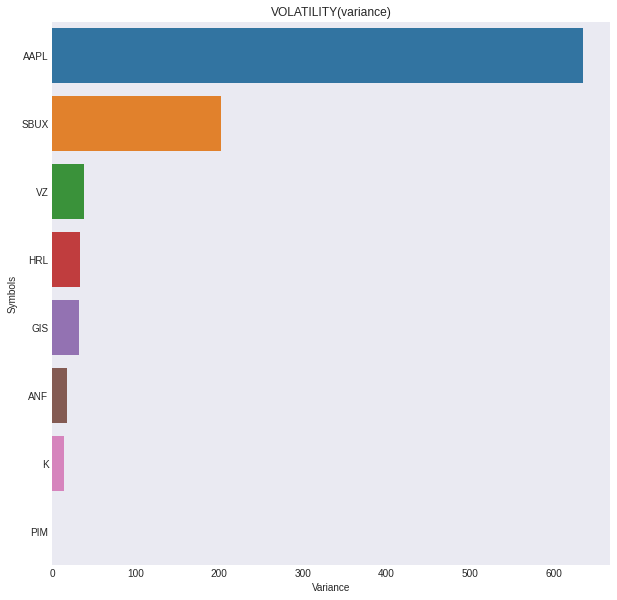

In [ ]:
horizontal_plot(volatility_df['Variance'], volatility_df.index, 'VOLATILITY(variance)', 'Variance', 'Symbols')

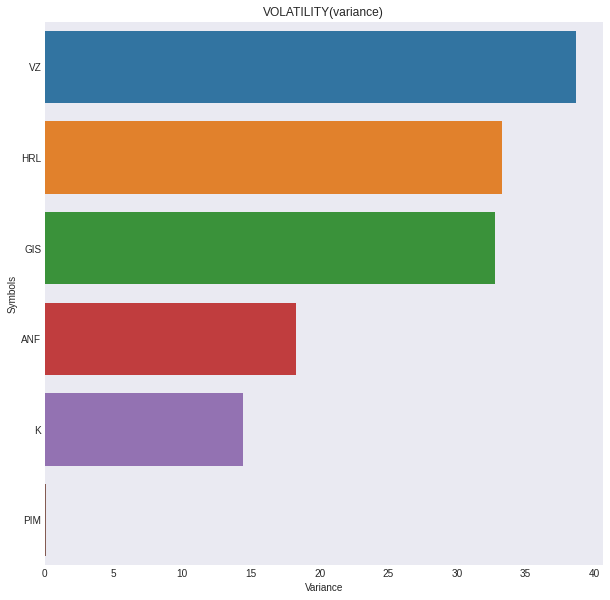

In [ ]:
horizontal_plot(volatility_df['Variance'].drop(['AAPL', 'SBUX']), volatility_df.index.drop(['AAPL', 'SBUX']), 'VOLATILITY(variance)', 'Variance', 'Symbols')

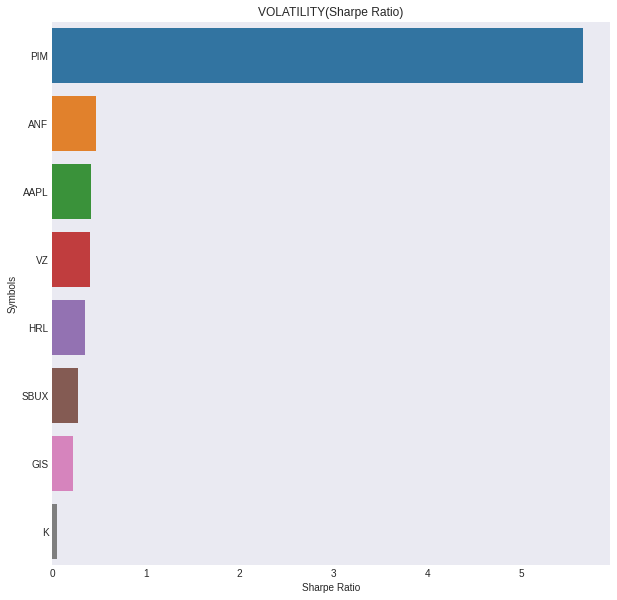

In [ ]:
horizontal_plot(volatility_df['Sharpe_Ratio'], volatility_df.index, 'VOLATILITY(Sharpe Ratio)', 'Sharpe Ratio', 'Symbols')

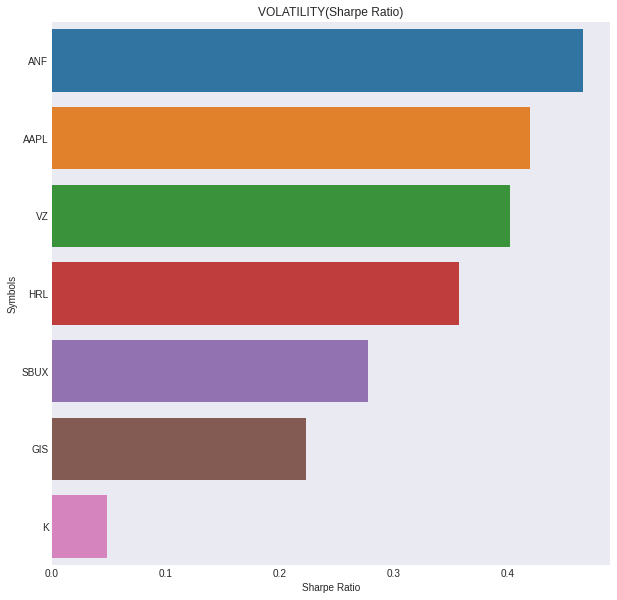

In [ ]:
horizontal_plot(volatility_df['Sharpe_Ratio'].drop('PIM'), volatility_df.index.drop('PIM'), 'VOLATILITY(Sharpe Ratio)', 'Sharpe Ratio', 'Symbols')

In [ ]:
def area_plot(x,y):
  fig = go.Figure()
  fig.add_trace(go.Scatter(
    x=x, y=y,
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5, color='rgb(131, 90, 241)'),
    stackgroup='one' # define stack group
    ))
  fig.update_layout(yaxis_range=(0, 50))
  fig.show()

In [ ]:
area_plot(volatility_df.index, volatility_df['Std_Deviation'])

## Risk Management - Monthly Basis
- Covariance 
- Value at Risk


In [ ]:
monthly_data

,AAPL,ANF,GIS,HRL,K,PIM,SBUX,VZ
Date,,,,,,,,
2016-01-31,23.043,19.575,46.947,33.661,59.695,2.802,52.441,37.336
2016-02-29,22.943,20.541,48.497,36.638,61.509,2.750,52.258,39.241
2016-03-31,24.457,23.846,49.449,37.537,61.914,2.819,52.865,40.562
2016-04-30,24.212,22.474,49.774,34.322,62.446,2.869,52.812,39.452
2016-05-31,22.865,18.988,50.162,32.513,61.290,2.861,50.339,39.171
2016-06-30,22.616,15.574,53.080,31.529,63.562,2.861,50.479,41.368
2016-07-31,23.430,16.940,55.746,32.735,66.545,2.901,52.177,42.198
2016-08-31,24.871,18.387,54.669,33.998,65.782,2.941,51.282,40.533
2016-09-30,25.591,14.981,52.065,33.102,63.796,2.936,49.610,40.497


In [ ]:
monthly_return = monthly_data.pct_change().fillna(0)

In [ ]:
monthly_return

,AAPL,ANF,GIS,HRL,K,PIM,SBUX,VZ
Date,,,,,,,,
2016-01-31,0.000,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
2016-02-29,-0.004,4.938e-02,0.033,8.845e-02,3.039e-02,-1.864e-02,-3.483e-03,5.105e-02
2016-03-31,0.066,1.609e-01,0.020,2.453e-02,6.590e-03,2.527e-02,1.161e-02,3.366e-02
2016-04-30,-0.010,-5.752e-02,0.007,-8.566e-02,8.591e-03,1.752e-02,-1.004e-03,-2.737e-02
2016-05-31,-0.056,-1.551e-01,0.008,-5.269e-02,-1.852e-02,-2.576e-03,-4.682e-02,-7.111e-03
2016-06-30,-0.011,-1.798e-01,0.058,-3.028e-02,3.708e-02,-1.867e-04,2.781e-03,5.609e-02
2016-07-31,0.036,8.771e-02,0.050,3.827e-02,4.693e-02,1.404e-02,3.364e-02,2.006e-02
2016-08-31,0.062,8.539e-02,-0.019,3.856e-02,-1.146e-02,1.374e-02,-1.716e-02,-3.947e-02
2016-09-30,0.029,-1.852e-01,-0.048,-2.635e-02,-3.020e-02,-1.756e-03,-3.260e-02,-8.731e-04


In [ ]:
covariance = monthly_return.cov()

In [ ]:
covariance

,AAPL,ANF,GIS,HRL,K,PIM,SBUX,VZ
AAPL,5.155e-03,1.082e-04,8.525e-04,7.266e-04,9.819e-04,8.983e-04,6.069e-04,1.846e-04
ANF,1.082e-04,1.353e-02,-4.661e-04,4.237e-04,6.234e-05,4.468e-04,1.365e-03,7.689e-04
GIS,8.525e-04,-4.661e-04,1.864e-03,5.175e-04,7.411e-04,2.511e-04,6.371e-04,7.028e-04
HRL,7.266e-04,4.237e-04,5.175e-04,1.244e-03,3.592e-04,9.300e-05,5.352e-04,4.282e-04
K,9.819e-04,6.234e-05,7.411e-04,3.592e-04,1.145e-03,1.157e-04,8.786e-05,2.509e-04
PIM,8.983e-04,4.468e-04,2.511e-04,9.300e-05,1.157e-04,5.733e-04,6.301e-04,2.376e-04
SBUX,6.069e-04,1.365e-03,6.371e-04,5.352e-04,8.786e-05,6.301e-04,2.145e-03,5.362e-04
VZ,1.846e-04,7.689e-04,7.028e-04,4.282e-04,2.509e-04,2.376e-04,5.362e-04,1.106e-03


In [ ]:
def var_historic(r, level=1):
    """
    Takes in a series of returns (r), and the percentage level
(level)
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

In [ ]:
VAR_at_99p = var_historic(monthly_return)

In [ ]:
VAR_at_99p

AAPL    0.120
ANF     0.221
GIS     0.090
HRL     0.066
K       0.067
PIM     0.060
SBUX    0.104
VZ      0.057
dtype: float64

In [ ]:
VAR_at_95p = var_historic(monthly_return, level=5)

In [ ]:
VAR_at_95p

AAPL    0.077
ANF     0.186
GIS     0.060
HRL     0.041
K       0.049
PIM     0.019
SBUX    0.048
VZ      0.040
dtype: float64

In [ ]:
VAR_df = pd.concat([VAR_at_99p, VAR_at_95p], axis=1)

In [ ]:
VAR_df.columns = ['VAR_at_99p', 'VAR_at_95p']

In [ ]:
VAR_df

,VAR_at_99p,VAR_at_95p
AAPL,0.120,0.077
ANF,0.221,0.186
GIS,0.090,0.060
HRL,0.066,0.041
K,0.067,0.049
PIM,0.060,0.019
SBUX,0.104,0.048
VZ,0.057,0.040


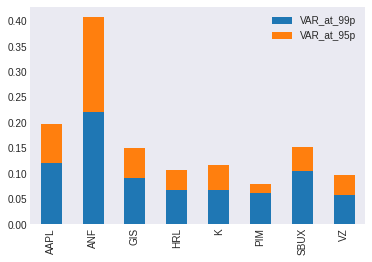

In [ ]:
VAR_df.plot(kind='bar', stacked=True)

## Correlation matrix

In [ ]:
correlation = monthly_return.corr()

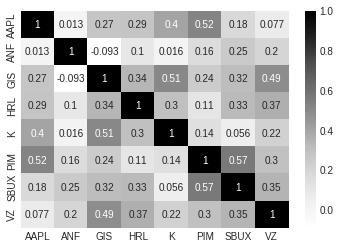

In [ ]:
sns.heatmap(correlation, annot=True, cmap='Greys')

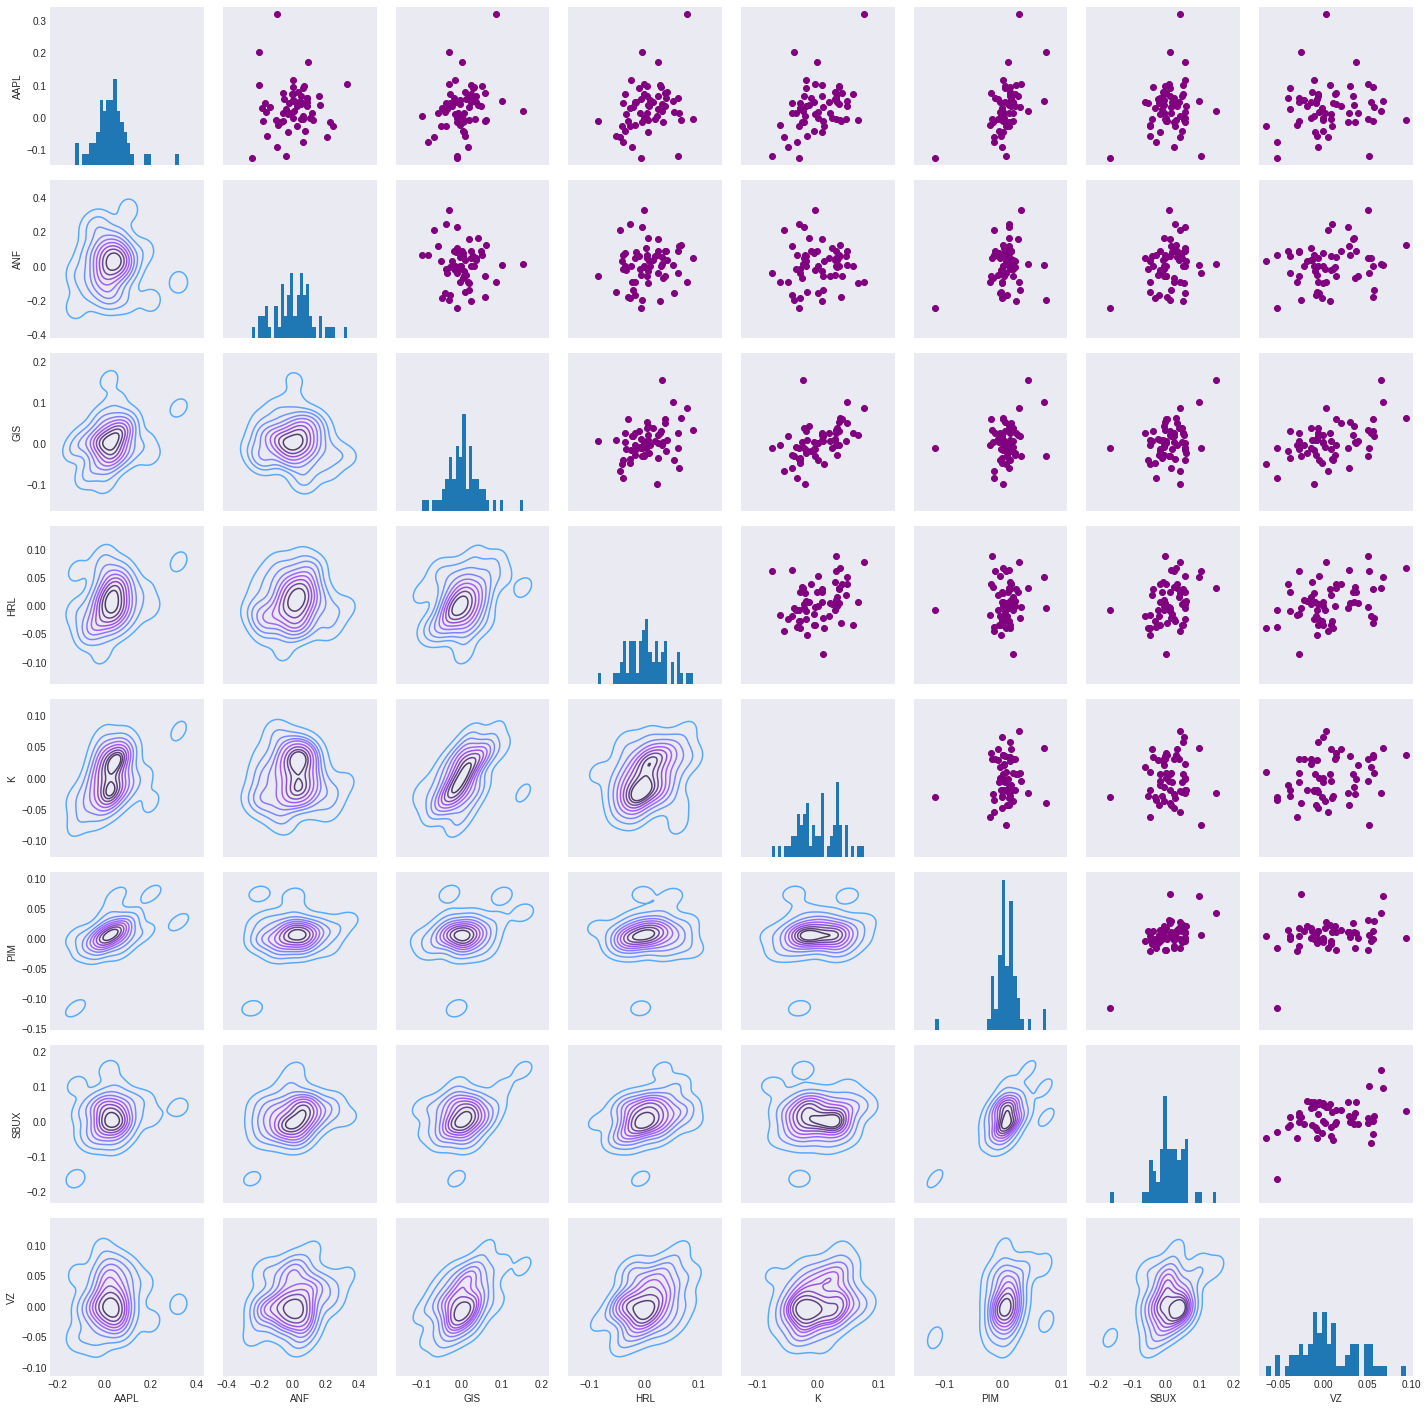

In [ ]:
# call PairPLot on the DataFrame
returns_fig = sns.PairGrid(monthly_return)

# specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter,color='purple')

# define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

## Efficient Frontier and Portfolio Optimization

In [ ]:
stocks_df.head()

,Date,AAPL,ANF,GIS,HRL,K,PIM,SBUX,VZ
0,2000-01-03,0.993,9.721,8.473,2.784,12.154,0.980,3.601,18.328
1,2000-01-05,0.948,7.145,9.374,2.541,12.858,0.997,3.206,19.468
2,2000-01-06,0.679,5.774,10.194,2.882,15.482,1.007,3.575,17.963
3,2000-01-11,0.313,16.160,10.737,2.882,13.391,1.115,4.618,19.020
4,2000-01-12,0.260,13.626,10.639,3.122,13.058,1.081,4.585,19.127


In [ ]:
returns_daily = stocks_df.set_index('Date').pct_change()
returns_annual = returns_daily.mean() * 250

In [ ]:
returns_annual

AAPL    2.771
ANF     3.176
GIS     0.396
HRL     0.554
K       0.349
PIM     0.292
SBUX    1.209
VZ      0.406
dtype: float64

In [ ]:
# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [ ]:
cov_daily

,AAPL,ANF,GIS,HRL,K,PIM,SBUX,VZ
AAPL,2.366e-02,5.330e-03,3.155e-04,2.011e-03,1.523e-03,1.800e-03,3.656e-03,1.800e-03
ANF,5.330e-03,3.328e-02,-7.566e-04,3.770e-03,1.294e-03,3.549e-03,7.158e-03,1.540e-03
GIS,3.155e-04,-7.566e-04,2.320e-03,7.766e-04,1.214e-03,3.383e-04,9.998e-04,7.178e-04
HRL,2.011e-03,3.770e-03,7.766e-04,3.277e-03,1.151e-03,7.610e-04,2.246e-03,9.497e-04
K,1.523e-03,1.294e-03,1.214e-03,1.151e-03,2.125e-03,7.392e-04,1.111e-03,3.929e-04
PIM,1.800e-03,3.549e-03,3.383e-04,7.610e-04,7.392e-04,1.795e-03,1.968e-03,3.844e-04
SBUX,3.656e-03,7.158e-03,9.998e-04,2.246e-03,1.111e-03,1.968e-03,8.459e-03,1.038e-03
VZ,1.800e-03,1.540e-03,7.178e-04,9.497e-04,3.929e-04,3.844e-04,1.038e-03,2.882e-03


In [ ]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

In [ ]:
# set the number of combinations for imaginary portfolios
num_assets = len(stock_names)
num_portfolios = 50000

In [ ]:
#set random seed for reproduction's sake
np.random.seed(42)

In [ ]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [ ]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

In [ ]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(stock_names):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

In [ ]:
# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

In [ ]:
df.head()

,Returns,Volatility,Sharpe Ratio,AAPL Weight,ANF Weight,GIS Weight,HRL Weight,K Weight,PIM Weight,SBUX Weight,VZ Weight
0,1.336,0.967,1.382,0.096,0.244,0.188,0.154,0.040,0.040,0.015,0.223
1,1.377,0.997,1.381,0.162,0.191,0.006,0.261,0.224,0.057,0.049,0.049
2,1.215,0.867,1.401,0.103,0.177,0.146,0.098,0.207,0.047,0.099,0.124
3,1.526,1.092,1.398,0.135,0.233,0.059,0.152,0.176,0.014,0.180,0.051
4,1.197,0.943,1.269,0.015,0.220,0.224,0.187,0.071,0.023,0.159,0.102


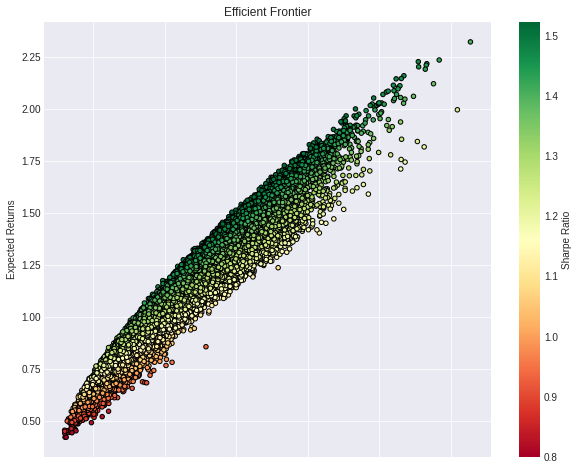

In [ ]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [ ]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

In [ ]:
# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]


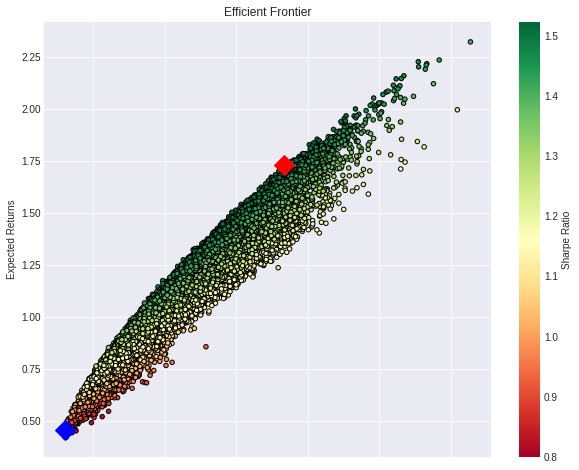

In [ ]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [ ]:
# print the details of the 2 special portfolios
print('Minimum variance portfolio:\n',min_variance_port.T)
print('Maximum Sharpe ratio portfolio:\n',sharpe_portfolio.T)

Minimum variance portfolio:
               43838
Returns       0.453
Volatility    0.520
Sharpe Ratio  0.871
AAPL Weight   0.025
ANF Weight    0.004
GIS Weight    0.150
HRL Weight    0.094
K Weight      0.183
PIM Weight    0.267
SBUX Weight   0.009
VZ Weight     0.268
Maximum Sharpe ratio portfolio:
               44041
Returns       1.727
Volatility    1.135
Sharpe Ratio  1.523
AAPL Weight   0.314
ANF Weight    0.180
GIS Weight    0.299
HRL Weight    0.041
K Weight      0.022
PIM Weight    0.008
SBUX Weight   0.099
VZ Weight     0.037


In [ ]:
min_variance_port.columns

Index(['Returns', 'Volatility', 'Sharpe Ratio', 'AAPL Weight', 'ANF Weight',
       'GIS Weight', 'HRL Weight', 'K Weight', 'PIM Weight', 'SBUX Weight',
       'VZ Weight'],
      dtype='object')

Text(0.5, 1.0, 'Asset allocation - min_varinace_portfolio')

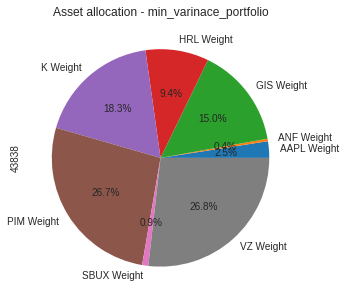

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
min_variance_port[['AAPL Weight', 'ANF Weight',
       'GIS Weight', 'HRL Weight', 'K Weight', 'PIM Weight', 'SBUX Weight',
       'VZ Weight']].iloc[0].plot(kind='pie', ax=ax, autopct='%1.1f%%')

ax.set_title('Asset allocation - min_varinace_portfolio')

Text(0.5, 1.0, 'Asset allocation - high_sharpe_ratio_portfolio')

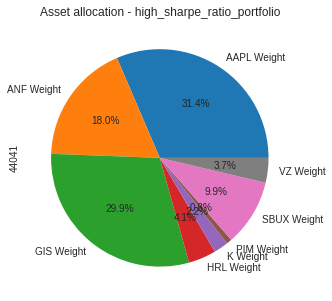

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
sharpe_portfolio[['AAPL Weight', 'ANF Weight',
       'GIS Weight', 'HRL Weight', 'K Weight', 'PIM Weight', 'SBUX Weight',
       'VZ Weight']].iloc[0].plot(kind='pie', ax=ax, autopct='%1.1f%%')

ax.set_title('Asset allocation - high_sharpe_ratio_portfolio')